<a href="https://colab.research.google.com/github/riszwinger/tensorflow_cert/blob/main/basic/CatsVsDogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Library

In [1]:
import os
import zipfile

import tensorflow as tf
from tensorflow.keras.layers import Conv2D,Flatten,Dense,Dropout,MaxPool2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers  import RMSprop

from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array

## Download Data

In [2]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip

--2021-08-08 02:39:37--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.195.128, 173.194.197.128, 64.233.191.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   174MB/s    in 0.4s    

2021-08-08 02:39:38 (174 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [3]:
!ls /tmp/

cats_and_dogs_filtered.zip
dap_multiplexer.0e71931d619a.root.log.INFO.20210808-022243.51
dap_multiplexer.INFO
debugger_2m4ckotj2
initgoogle_syslog_dir.0


## Unzip

In [4]:
local_zip="/tmp/cats_and_dogs_filtered.zip"
zipref=zipfile.ZipFile(local_zip,'r')
zipref.extractall("/tmp/")
zipref.close()

In [5]:
!ls /tmp/cats_and_dogs_filtered/

train  validation  vectorize.py


In [6]:
!ls /tmp/cats_and_dogs_filtered/train

cats  dogs


In [7]:
train_dir="/tmp/cats_and_dogs_filtered/train"
val_dir="/tmp/cats_and_dogs_filtered/validation"

print('Number of Training Dogs: {}, Number of Training Cats: {}'.format(len(os.listdir(os.path.join(train_dir,'dogs'))) , len(os.listdir(os.path.join(train_dir,'cats')))))
print('Number of Val Dogs: {}, Number of Val Cats: {}'.format(len(os.listdir(os.path.join(val_dir,'dogs'))) , len(os.listdir(os.path.join(val_dir,'cats')))))

Number of Training Dogs: 1000, Number of Training Cats: 1000
Number of Val Dogs: 500, Number of Val Cats: 500


In [8]:
import random
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def visualize_data(labels,dir,title):
  
  #labels=['horses','humans']
  num_class=len(labels)
  #train_dir="/tmp/horse-or-human/"
  fig,ax=plt.subplots(num_class,5,figsize=(15,7))
  for i in range(num_class):
    for j in range(5):
      #img_list=random.shuffle(os.listdir(os.path.join(train_dir,labels[i])),random.random)
      img_list=(os.listdir(os.path.join(dir,labels[i])))
      #print(img_list)
      img=img_list[random.randint(0,len(img_list))]
      ax[i,j].imshow(mpimg.imread(os.path.join(dir,labels[i],img)))
      ax[i,j].set_title(img)
      ax[i,j].axis('off')

  #plt.tight_layout()
  plt.suptitle(title)

  plt.show()




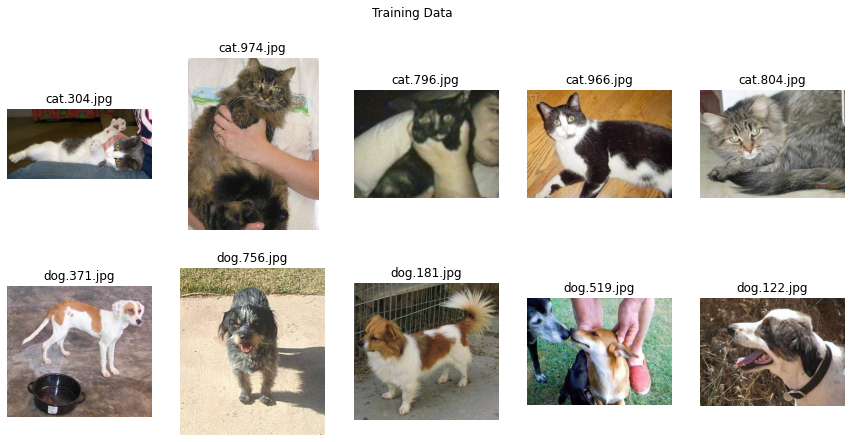

______________________________________________________________________________________________________________________________________________________


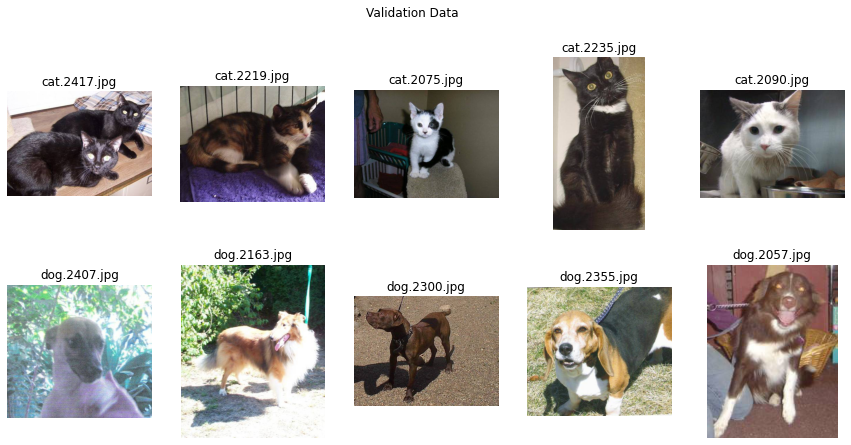

In [9]:
labels=['cats','dogs']
dir=train_dir
title='Training Data'
visualize_data(labels,dir,title)
print("_"*150)
dir=val_dir
title='Validation Data'
visualize_data(labels,dir,title)

## Model Building

In [10]:
model=Sequential()
model.add(Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(MaxPool2D(2,2))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [11]:
model.compile(optimizer=RMSprop(learning_rate=0.001),loss='binary_crossentropy',metrics=['acc'])

## ImageData Generator

In [12]:
train_datagen=ImageDataGenerator(rescale=1./255)
val_datagen=ImageDataGenerator(rescale=1./255)



In [13]:
train_generator=train_datagen.flow_from_directory(train_dir,target_size=(150,150),class_mode='binary',batch_size=100)
val_generator=val_datagen.flow_from_directory(val_dir,target_size=(150,150),class_mode='binary',batch_size=100)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [14]:
steps_per_epoch=2000/100
validation_steps=1000/100
print('Steps Per Ecpoh: {}, Validation Steps: {}'.format(steps_per_epoch,validation_steps))

Steps Per Ecpoh: 20.0, Validation Steps: 10.0


In [15]:
history=model.fit(train_generator,steps_per_epoch=steps_per_epoch,epochs=10,verbose=2,validation_data=val_generator,validation_steps=validation_steps)

Epoch 1/10
20/20 - 48s - loss: 1.3161 - acc: 0.5265 - val_loss: 0.6757 - val_acc: 0.5240
Epoch 2/10
20/20 - 47s - loss: 0.6698 - acc: 0.5810 - val_loss: 0.7110 - val_acc: 0.5080
Epoch 3/10
20/20 - 48s - loss: 0.6936 - acc: 0.6045 - val_loss: 0.6710 - val_acc: 0.5540
Epoch 4/10
20/20 - 45s - loss: 0.6702 - acc: 0.6540 - val_loss: 0.6455 - val_acc: 0.6190
Epoch 5/10
20/20 - 46s - loss: 0.6193 - acc: 0.6755 - val_loss: 0.6243 - val_acc: 0.6540
Epoch 6/10
20/20 - 45s - loss: 0.6076 - acc: 0.6840 - val_loss: 0.6217 - val_acc: 0.6750
Epoch 7/10
20/20 - 45s - loss: 0.5424 - acc: 0.7415 - val_loss: 0.6487 - val_acc: 0.6640
Epoch 8/10
20/20 - 45s - loss: 0.5184 - acc: 0.7490 - val_loss: 0.6814 - val_acc: 0.5940
Epoch 9/10
20/20 - 45s - loss: 0.4895 - acc: 0.7560 - val_loss: 0.5955 - val_acc: 0.6770
Epoch 10/10
20/20 - 45s - loss: 0.4642 - acc: 0.8015 - val_loss: 0.6132 - val_acc: 0.7010


## Test User Images

In [16]:
import numpy as np

from google.colab import files

uploaded=files.upload()
for fn in uploaded.keys():
  path='/content/' + fn
  img=load_img(path, target_size=(150, 150))
  x=img_to_array(img)
  #print('Before=',x.shape)
  x=np.expand_dims(x,axis=0)
  #print('After=',x.shape)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  
  print(classes[0])
  
  if classes[0]>0:
    print(fn + " is a dog")
    
  else:
    print(fn + " is a cat")
 


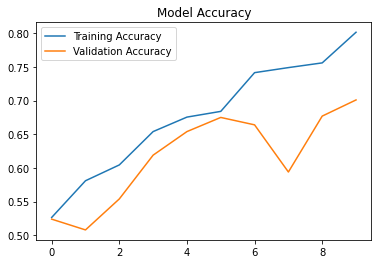

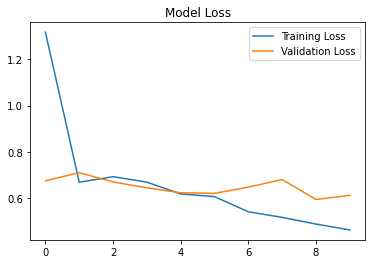

In [19]:
train_acc=history.history['acc']
val_acc=history.history['val_acc']
epochs=range(len(train_acc))
plt.plot(epochs,train_acc,label='Training Accuracy')
plt.plot(epochs,val_acc,label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.figure()

train_loss=history.history['loss']
val_loss=history.history['val_loss']
plt.plot(epochs,train_loss,label='Training Loss')
plt.plot(epochs,val_loss,label='Validation Loss')
plt.legend()
plt.title('Model Loss')

plt.show()

## Visualize Layers

In [20]:
feature_extractor=tf.keras.Model(inputs=model.inputs,outputs=[layer.output for layer in model.layers])

In [26]:
os.path.join(train_dir,'cats',os.listdir(os.path.join(train_dir,'cats'))[0])

'/tmp/cats_and_dogs_filtered/train/cats/cat.507.jpg'

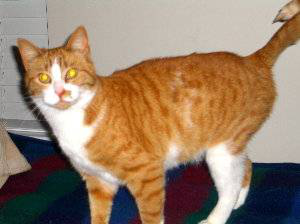

In [82]:
load_img(os.path.join(train_dir,'cats',os.listdir(os.path.join(train_dir,'cats'))[23]))

In [41]:
cat_img=img_to_array(load_img(os.path.join(train_dir,'cats',os.listdir(os.path.join(train_dir,'cats'))[23]),target_size=(150,150)))
print(cat_img.shape)

(150, 150, 3)


In [42]:
cat_img1=cat_img.reshape( (1,)+ cat_img.shape)
cat_img1.shape

(1, 150, 150, 3)

In [72]:
cat_img1/=255.0

In [73]:
op=feature_extractor.predict(cat_img1)
print(type(op))

<class 'list'>


In [74]:
len(op)

9

In [75]:
op[0].shape

(1, 148, 148, 16)

In [76]:
op[0][0].shape

(148, 148, 16)

In [77]:
op[0][0][:,:,2].shape

(148, 148)

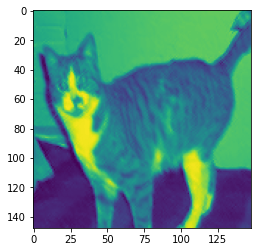

In [78]:
plt.imshow(op[0][0][:,:,3])

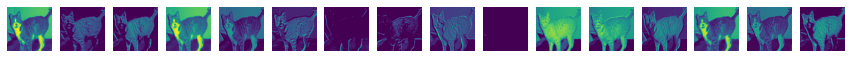

In [85]:
fig,ax=plt.subplots(1,16,figsize=(15,7))
for i in range(16):
  ax[i].imshow(op[0][0][:,:,i])
  ax[i].axis('off')

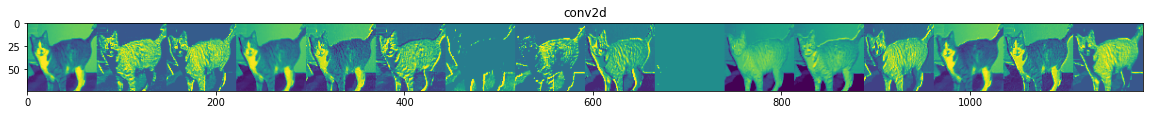

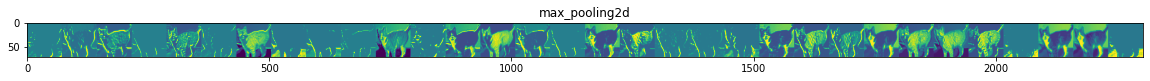

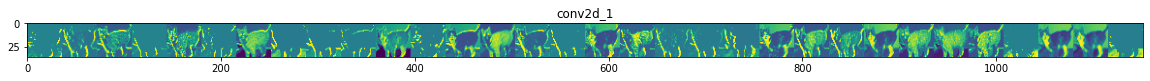

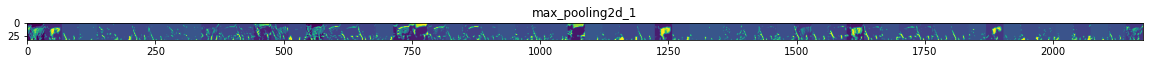

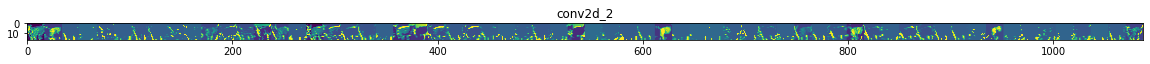

In [83]:
import numpy as np
import random
from   tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]

#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Let's prepare a random input image of a cat or dog from the training set.
cat_img_files = [os.path.join(train_dir,'cats',f)  for f in os.listdir(os.path.join(train_dir,'cats'))]
dog_img_files = [os.path.join(train_dir,'dogs',f)  for f in os.listdir(os.path.join(train_dir,'dogs'))]

#img_path = random.choice(cat_img_files + dog_img_files)
img_path=(os.path.join(train_dir,'cats',os.listdir(os.path.join(train_dir,'cats'))[23]))
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image

x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255.0

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# -----------------------------------------------------------------------
# Now let's display our representations
# -----------------------------------------------------------------------
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4:
    
    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------

    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 

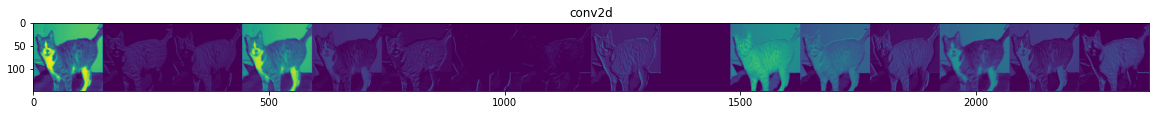

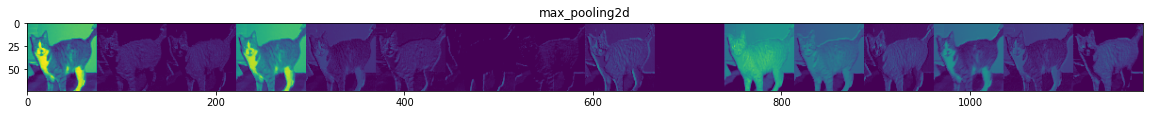

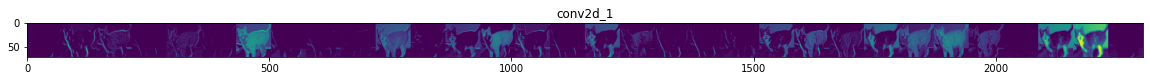

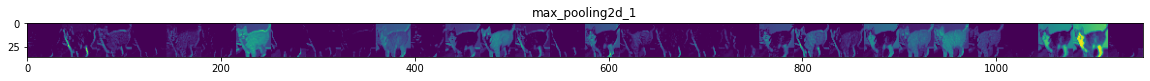

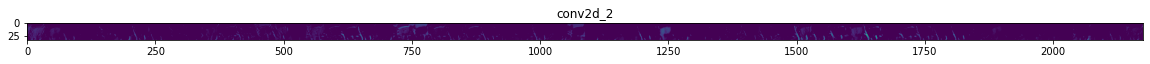

In [99]:
cnt=0
for l_name,l_op in zip(layer_name,op):
  #print('Layer: {}, Shape: {}'.format(l_name,l_op.shape))
  n_rows=l_op.shape[1]
  n_cols=l_op.shape[-1]

  f_grid=np.zeros((n_rows,(n_rows*n_cols)))
  #print(f_grid.shape)

  for i in range(n_cols):
    x=l_op[0,:,:,i]
    f_grid[:,i*n_rows:(i+1)*n_rows]=x

  #plt.imshow(f_grid)
  scale = 20. / n_cols
  plt.figure( figsize=(scale * n_cols, scale) )
  plt.title ( l_name )
  plt.grid  ( False )
  plt.imshow( f_grid, aspect='auto', cmap='viridis' ) 

  cnt+=1
  if cnt>4:
    break